In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
sales_train = pd.read_csv("C:/Users/chatt/Documents/Data_Analysis/Machine Learning/Sales Analysis/train.csv")

C:\Users\chatt\AppData\Local\Temp\ipykernel_37940\1476552347.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train = pd.read_csv("C:/Users/chatt/Documents/Data_Analysis/Machine Learning/Sales Analysis/train.csv")


DATA SUPERVISION: IMPORTING SALES TRAINING DATA

In [ ]:
sales_train.head()
# almost 1 million observations
# 1115 unique stores
# We will be trying to predict Sales (Target Variable)
# Column Information:
# Id: transaction ID (made from store+date info)
# Store: unique store id
# Sales: sales (euros)/day
# Customers: no. of customers on a given day
# Open: Boolean to say store is open or closed (0 = closed, 1= open)
# Promo: describes if store is running a promo
# StateHoliday: a= public holiday, b= Easter holiday, c= Christmas, 0 = None
# School Holiday: indicates if the (Store, Date) was affected by closure of public schools
# Data Source: https://www.kaggle.com/c/rossmann-store-sales/data  

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_train.info()
# 8 features
# 1 target variable -> Sales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
sales_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Average Sales amount per day = 5773 euros, Min. Sales per day = 0 euros; Max. Sales per day = 41551 euros

Average no. of customers = 633; Min no. of customers = 0; Max. no. of customers = 7388

DATA SUPERVISION: IMPORTING STORE INFORMATION DATA

In [7]:
storetype = pd.read_csv("C:/Users/chatt/Documents/Data_Analysis/Machine Learning/Sales Analysis/store.csv")

#StoreType: Categorical; determines store type: a, b, c, d
#Assortment: describes assortment level: a= basic, b= extra, c= extended
#CompetitionDistance: (meters) distance to closest competitor store
#CompetitionOpenSince [Month/Year]: sate since when competition is open
#Promo2: If store provides Promo2 ( 0=store is not providing, 1=store is providing)
#Promo2Since [Year/Week]: date since when store statrted participating in Promo2
#PromoInterval: describes the consecutive intervals Promo2 is started, naming the months

In [8]:
storetype.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
storetype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
storetype.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


On average, the competition distance is 5405 kms

DATA EXPLORATION: SALES TRAINING DATA

<Axes: >

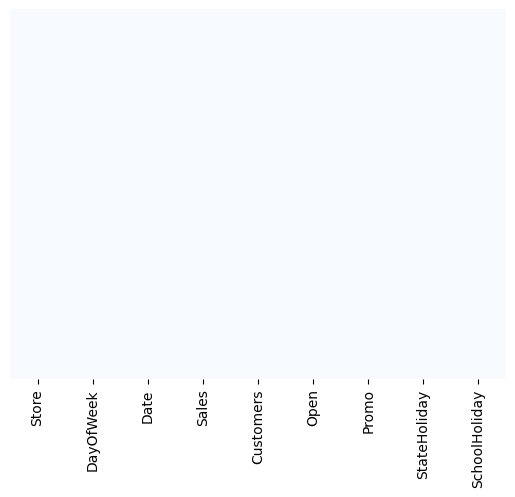

In [12]:
#checking missing data using a heatmap
sns.heatmap(sales_train.isnull(), yticklabels=False, cbar=False, cmap='Blues')

No Null elements!

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

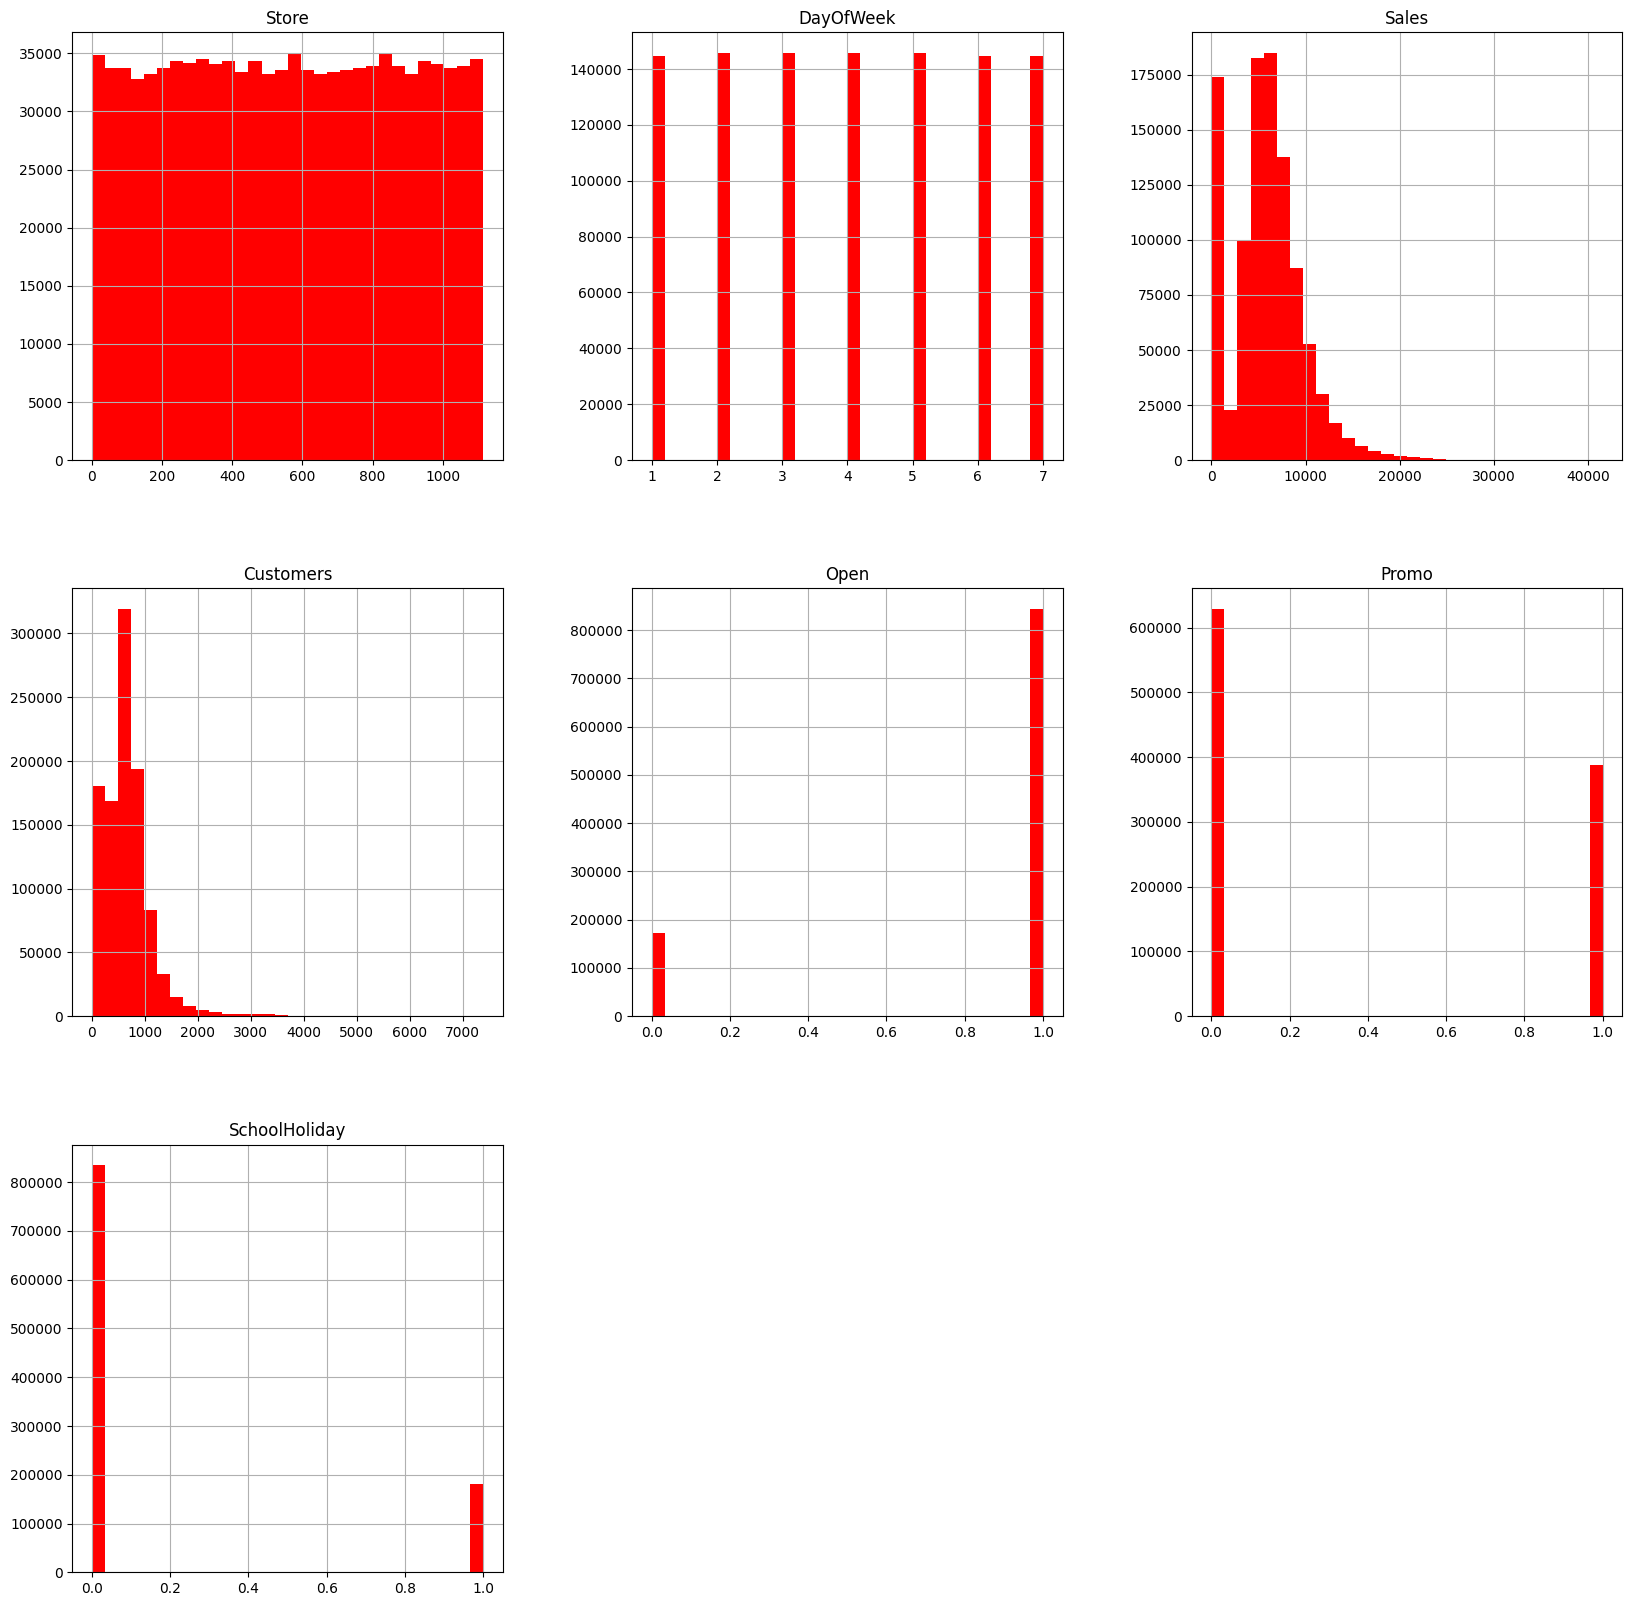

In [14]:
#Histogram of data
sales_train.hist(bins =30, figsize = (20,20), color ='r')

In [ ]:
#A quick cross check regarding a suspected outlier
sales_train['Customers'].max()

7388

In [16]:
#Checking the number of open and closed stores
print("Total Number of stores: ", len(sales_train))
print("No. of Closed Stores: ", len(sales_train[sales_train["Open"]==0]))
print("No. of Open Stores: ", len(sales_train[sales_train["Open"]==1]))

Total Number of stores:  1017209
No. of Closed Stores:  172817
No. of Open Stores:  844392


Summary:
1. Average 600 customers per day, maximum is 4500 (1 outlier at 7388)
2. Data is equally distributed across various Days of the week (~150,000 observations x 7 days = 1.1 mill observations)
3.Stores are open ~80% of the time
4. Promo1 was running ~40% of the time
5. Average sales around 5000-6000 euros
6. School holidays are around ~18% of the time

In [17]:
# Keeping only the Open Stores
sales_train = sales_train[sales_train["Open"]==1]

In [18]:
sales_train.drop(['Open'], axis=1, inplace=True)

C:\Users\chatt\AppData\Local\Temp\ipykernel_37940\3809667008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train.drop(['Open'], axis=1, inplace=True)


In [19]:
sales_train.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


Average Sales =  6955 euros; Average number of customers = 762

DATA EXPLORATION: STORES INFORMATION DATA

<Axes: >

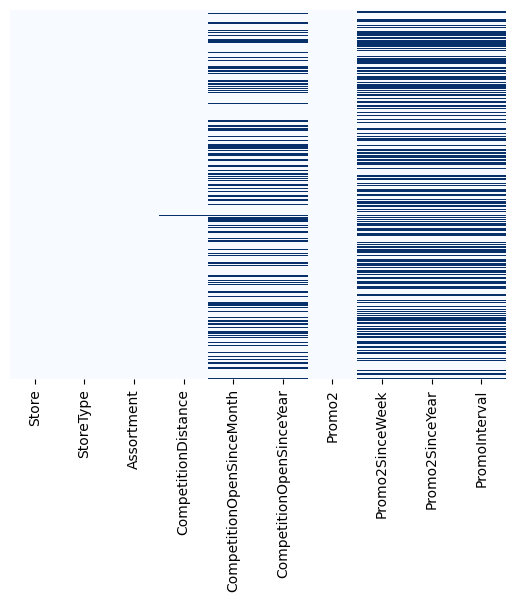

In [20]:
sns.heatmap(storetype.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [21]:
storetype[storetype['Promo2']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


Seems whenever Promo2 is 0, data related to that is NaN. We can choose to make these values as 0 too

In [22]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear','CompetitionOpenSinceMonth']
for str in str_cols:
    storetype[str].fillna(0, inplace=True)

C:\Users\chatt\AppData\Local\Temp\ipykernel_37940\2958162278.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  storetype[str].fillna(0, inplace=True)


<Axes: >

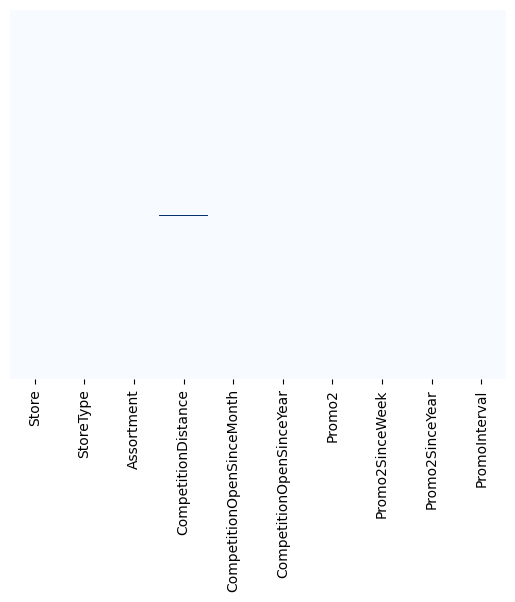

In [23]:
sns.heatmap(storetype.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [24]:
storetype['CompetitionDistance'].fillna(storetype['CompetitionDistance'].mean(), inplace=True)

C:\Users\chatt\AppData\Local\Temp\ipykernel_37940\2833292237.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  storetype['CompetitionDistance'].fillna(storetype['CompetitionDistance'].mean(), inplace=True)


array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

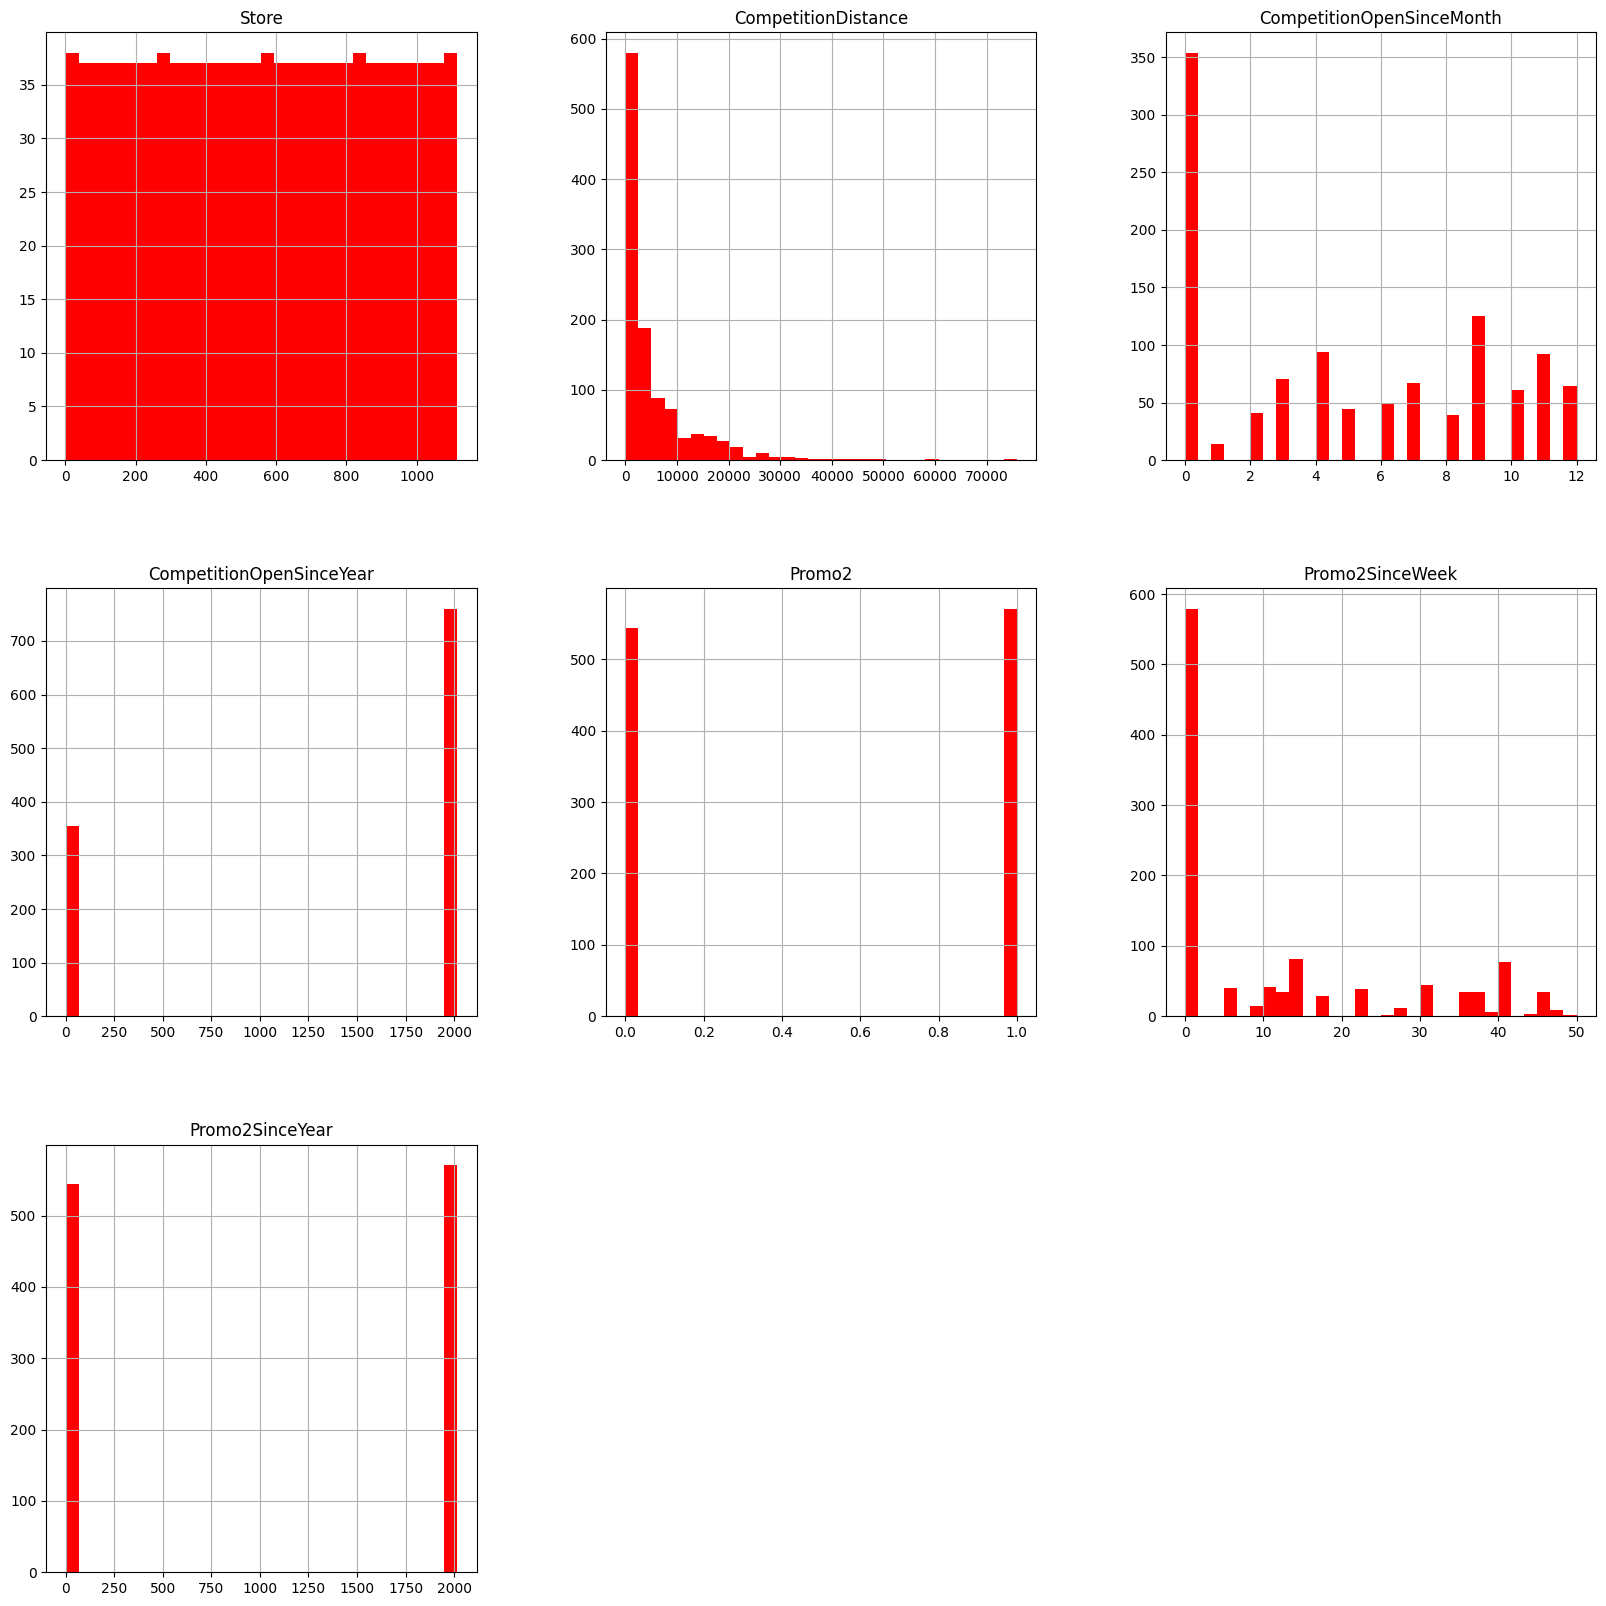

In [25]:
storetype.hist(bins=30, figsize=(20,20), color='r')

~Half of stores are involved in Promo2.

~Half of the stores have their competition at a distance of 0-3kms away

MERGING DATAFRAMES BASED ON STORE ID

In [27]:
sales_all = pd.merge(sales_train, storetype, how = 'inner', on = 'Store')

In [35]:
sales_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


Removing all the "Object" columns for correlation analysis

In [ ]:
# sales_all['Date'] = pd.to_datetime(sales_all['Date'])
correlations = sales_all.drop(columns=['Date','StoreType', 'Assortment','PromoInterval','StateHoliday']).corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

Customers and Promo1 are positively correlated with the sales

Promo2 does not seem to be effective at all

<Axes: >

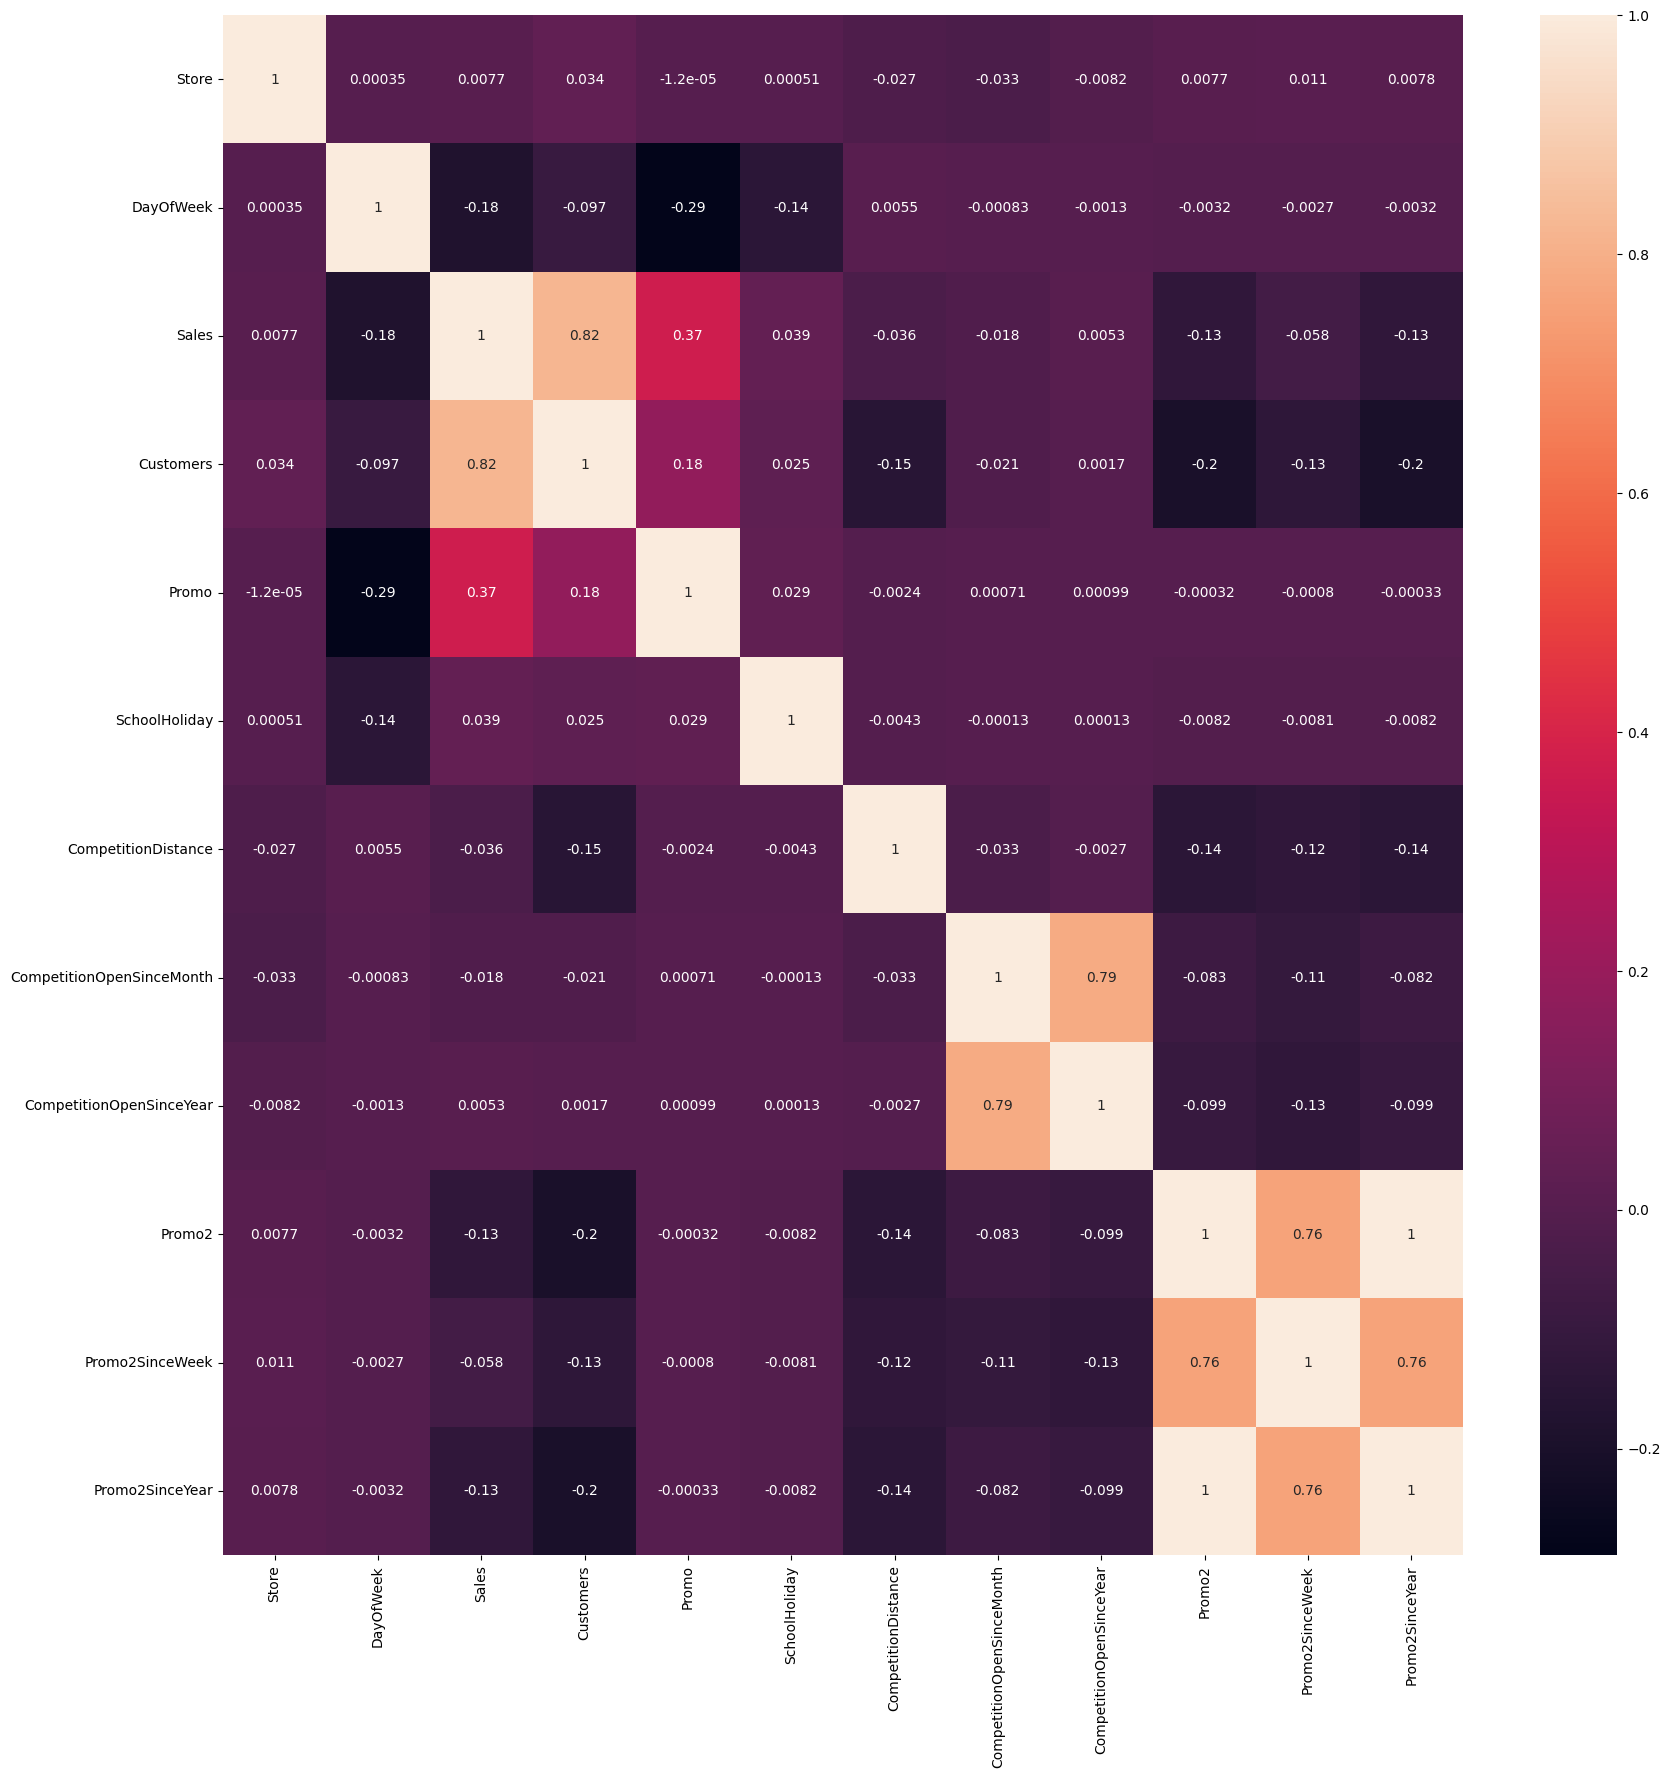

In [46]:
correlations = sales_all.drop(columns=['Date','StoreType', 'Assortment','PromoInterval','StateHoliday']).corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

In [48]:
sales_all['Year'] = pd.DatetimeIndex(sales_all['Date']).year

In [50]:
sales_all['Month'] = pd.DatetimeIndex(sales_all['Date']).month
sales_all['Day'] = pd.DatetimeIndex(sales_all['Date']).day

Plotting to see Monthly Average Sales

Text(0.5, 1.0, 'Average Customers Per Month')

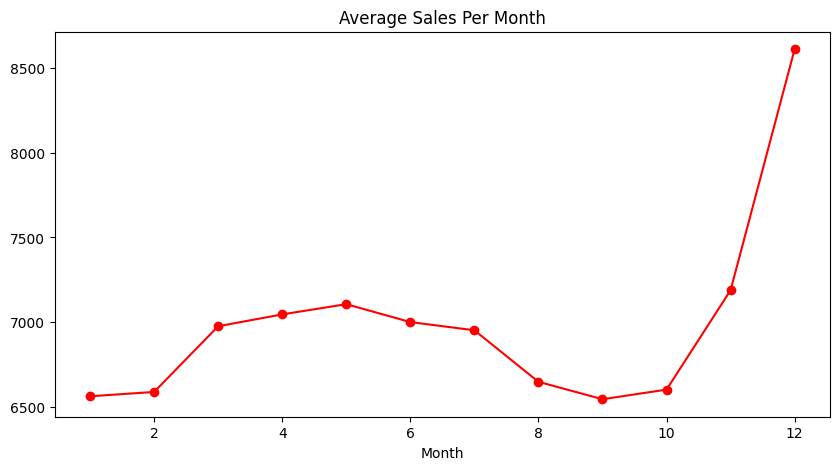

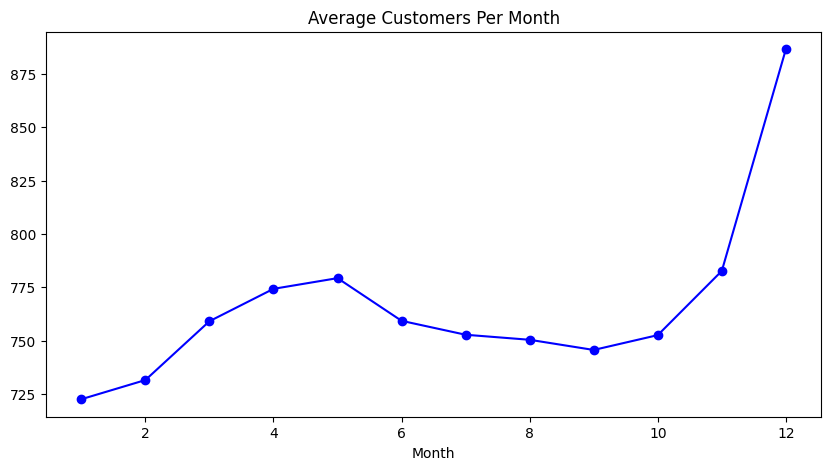

In [53]:
axis = sales_all.groupby('Month')['Sales'].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')

plt.figure()

axis = sales_all.groupby('Month')['Customers'].mean().plot(figsize = (10,5), marker = 'o', color = 'b')
axis.set_title('Average Customers Per Month')

Text(0.5, 1.0, 'Average Customers Per Day')

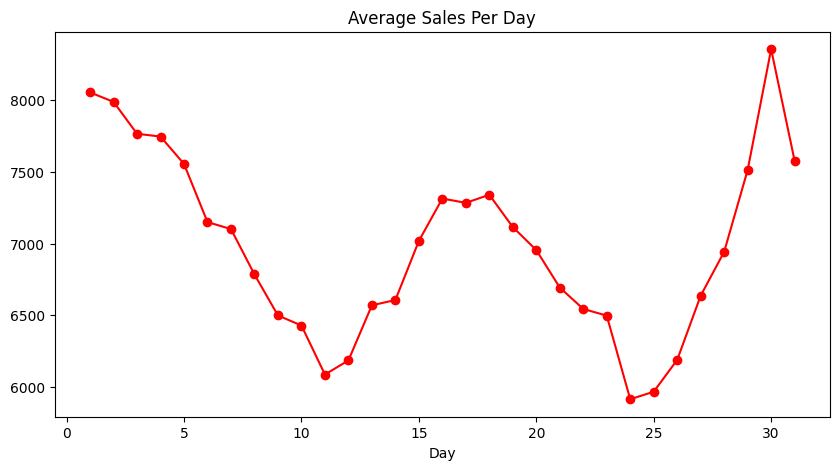

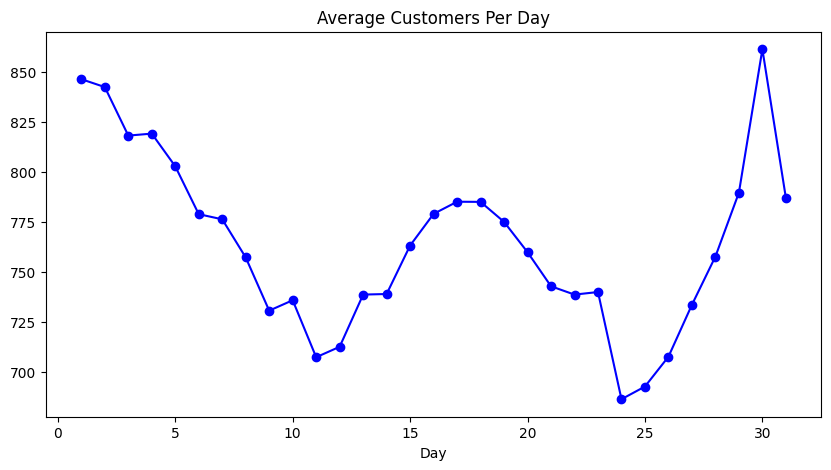

In [54]:
axis = sales_all.groupby('Day')['Sales'].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day')

plt.figure()

axis = sales_all.groupby('Day')['Customers'].mean().plot(figsize = (10,5), marker = 'o', color = 'b')
axis.set_title('Average Customers Per Day')

Text(0.5, 1.0, 'Average Customers Per Day of the Week')

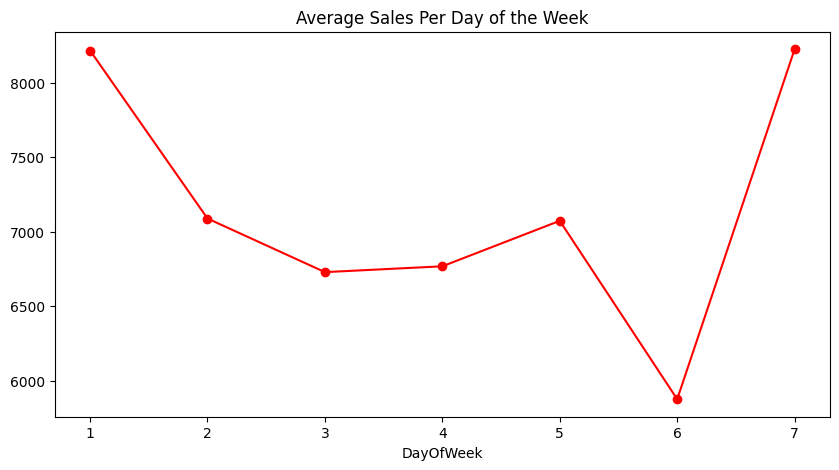

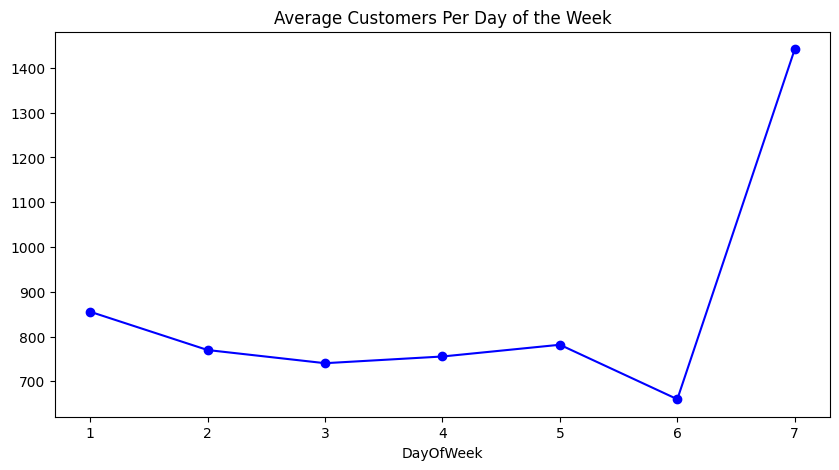

In [55]:
axis = sales_all.groupby('DayOfWeek')['Sales'].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day of the Week')

plt.figure()

axis = sales_all.groupby('DayOfWeek')['Customers'].mean().plot(figsize = (10,5), marker = 'o', color = 'b')
axis.set_title('Average Customers Per Day of the Week')

NOTE: No. 7 stands for Sunday

According to all the plots -> Sales increase during Holidays

Now, checking Sales according to Store Types: a, b, c, d

<Axes: xlabel='Date'>

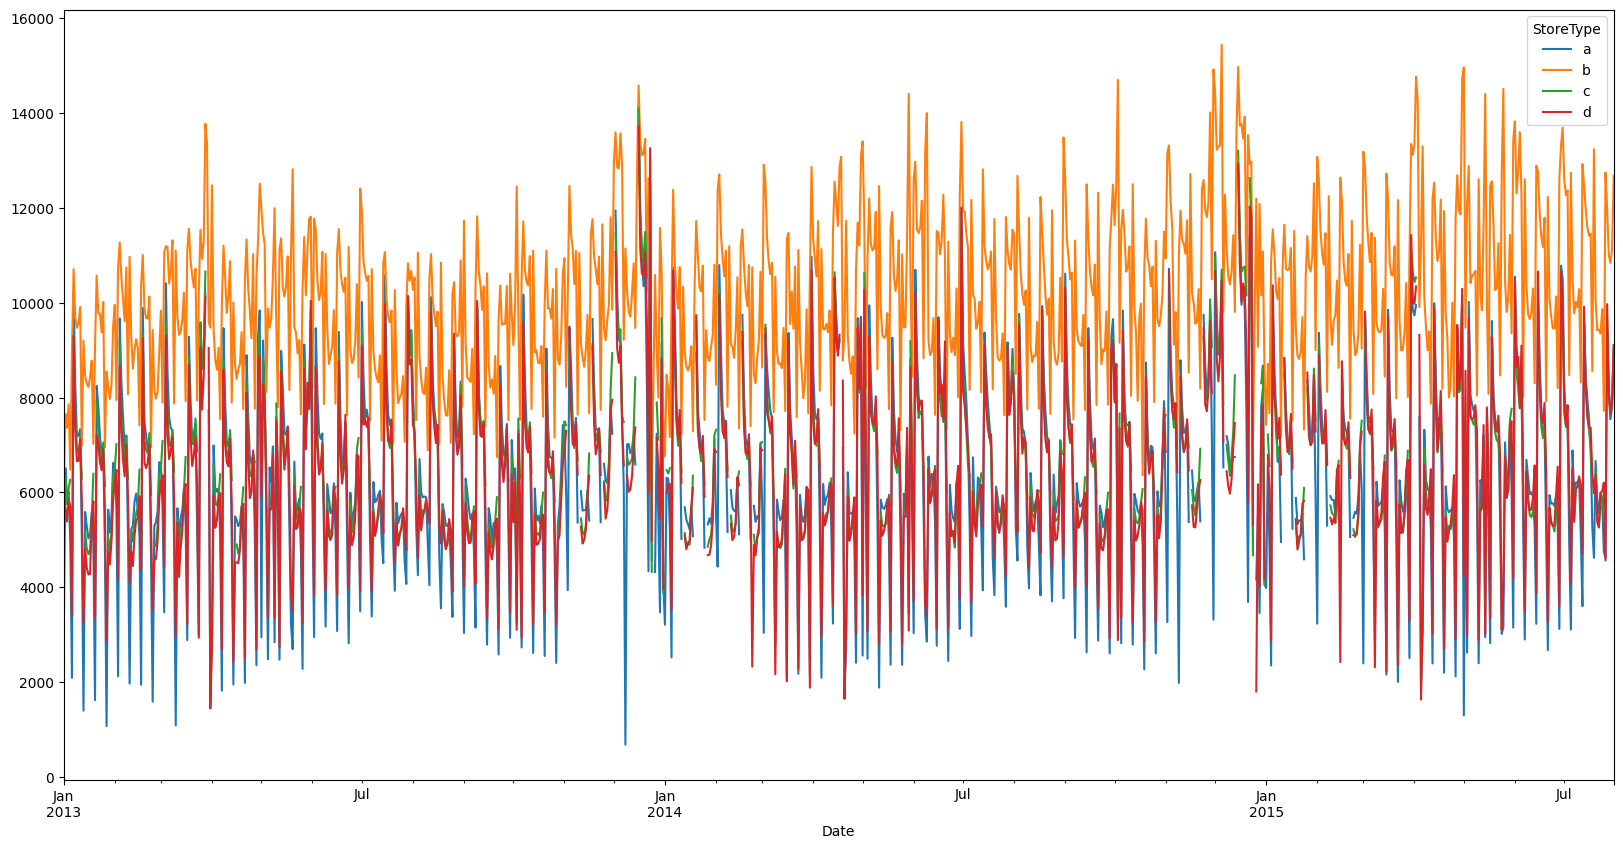

In [58]:
fig, ax = plt.subplots(figsize = (20,10))
sales_all['Date'] = pd.to_datetime(sales_all['Date'])
sales_all.groupby(['Date','StoreType'])['Sales'].mean().unstack().plot(ax=ax)

<Axes: xlabel='Promo', ylabel='Customers'>

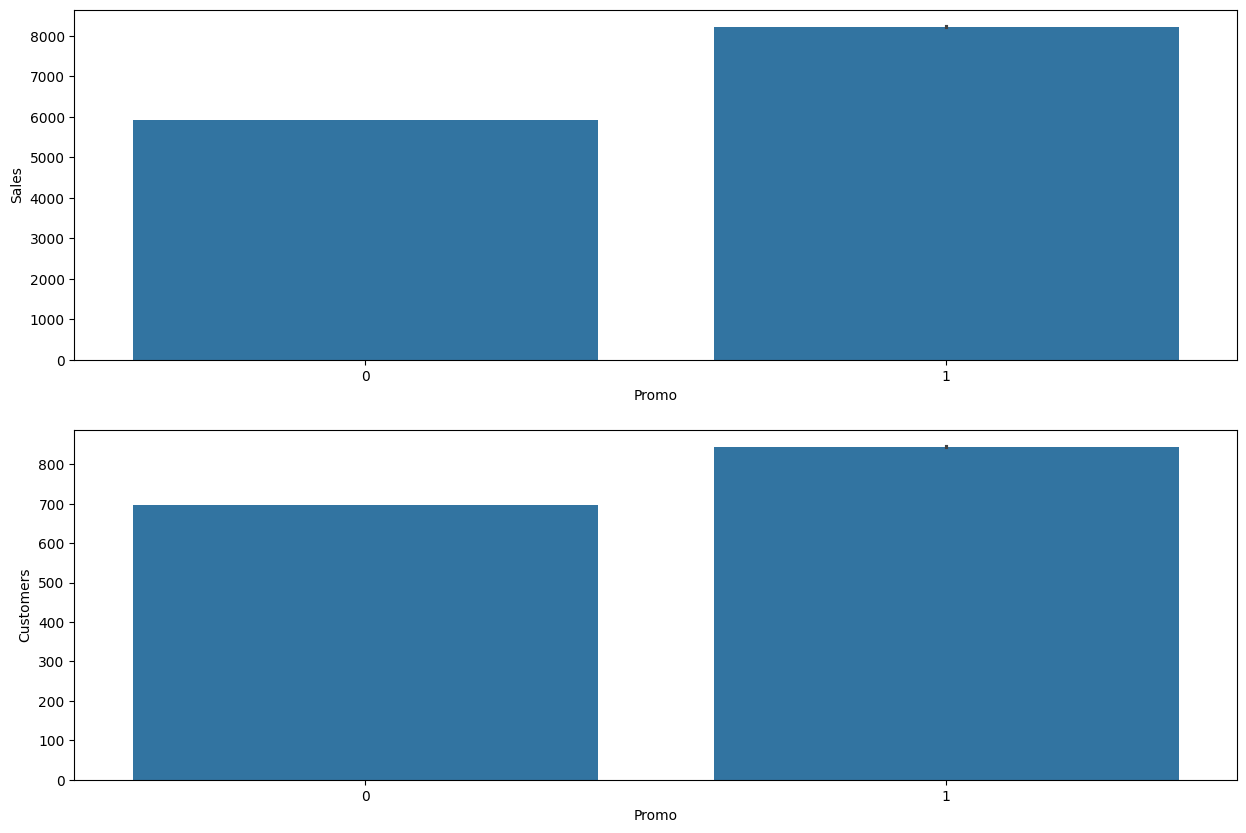

In [ ]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data= sales_all)
plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data= sales_all)

<Axes: xlabel='Promo', ylabel='Customers'>

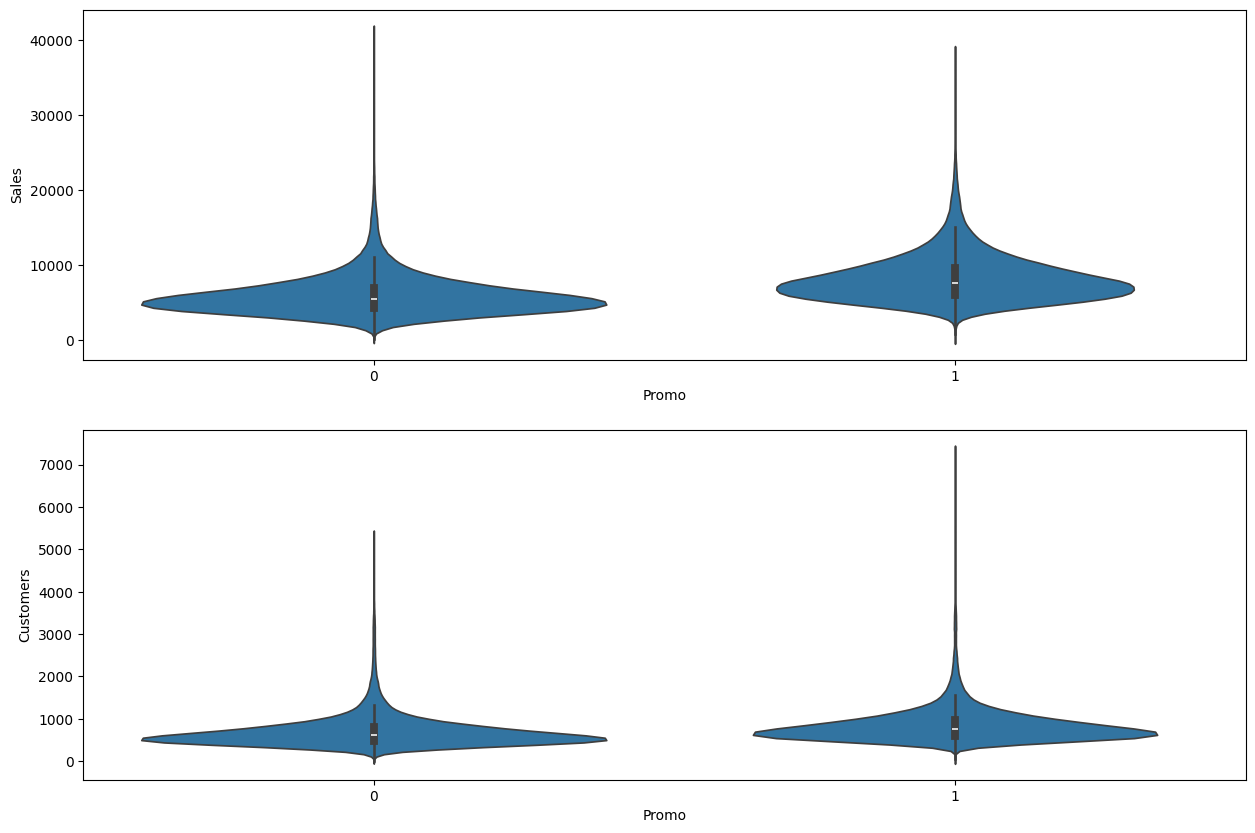

In [60]:
plt.figure(figsize=[15,10])
plt.subplot(211)
sns.violinplot(x = 'Promo', y = 'Sales', data= sales_all)
plt.subplot(212)
sns.violinplot(x = 'Promo', y = 'Customers', data= sales_all)

USING PROPHET FOR TIME-SERIES PREDICTION

In [65]:
#import prophet
from prophet import Prophet

c:\Users\chatt\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [79]:
def sales_predictions(Store_ID, sales_df, holidays, periods):
    sales_df = sales_df[sales_df['Store']==Store_ID]
    sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date':'ds', 'Sales':'y'})
    sales_df = sales_df.sort_values('ds')

    model = Prophet(holidays=holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel = 'Date', ylabel = 'Sales')
    figure2 = model.plot_components(forecast)

GET ALL DATES PERTAINING TO SCHOOL HOLIDAYS

In [88]:
school_holidays =  sales_all[sales_all['SchoolHoliday']==1].loc[:, 'Date'].values
school_holidays

array(['2015-07-31T00:00:00.000000000', '2015-07-31T00:00:00.000000000',
       '2015-07-31T00:00:00.000000000', ...,
       '2013-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [89]:
state_holidays =  sales_all[(sales_all['StateHoliday']=='a') | (sales_all['StateHoliday']=='b') | (sales_all['StateHoliday']=='c')].loc[:, 'Date'].values
state_holidays.shape

(910,)

In [90]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday':'state_holiday'})

school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday':'school_holiday'})

CONCATENATION OF THE 2 DATAFRAMES

In [93]:
school_state_holidays = pd.concat((state_holidays, school_holidays))

02:42:36 - cmdstanpy - INFO - Chain [1] start processing
02:42:36 - cmdstanpy - INFO - Chain [1] done processing


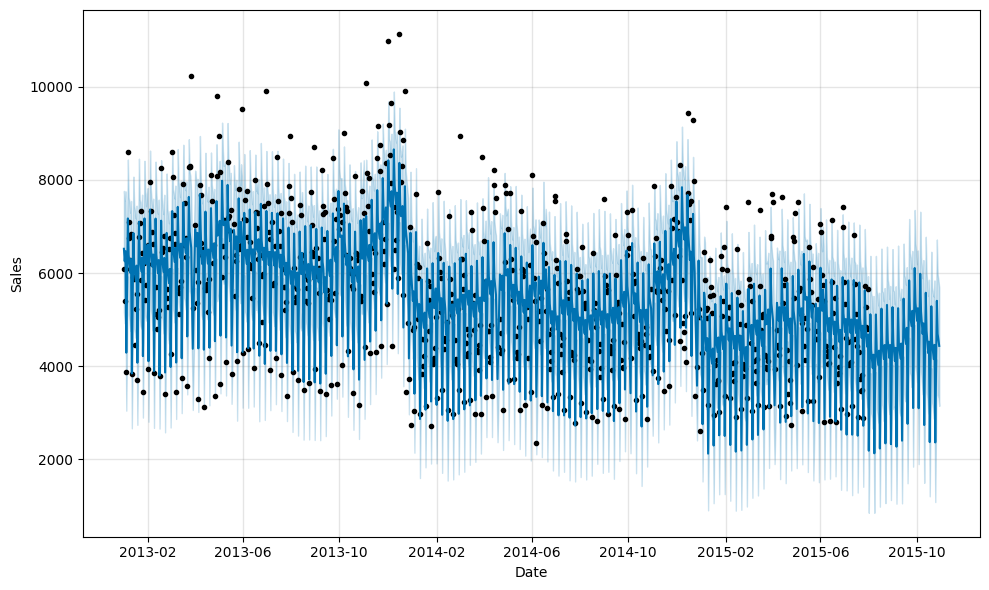

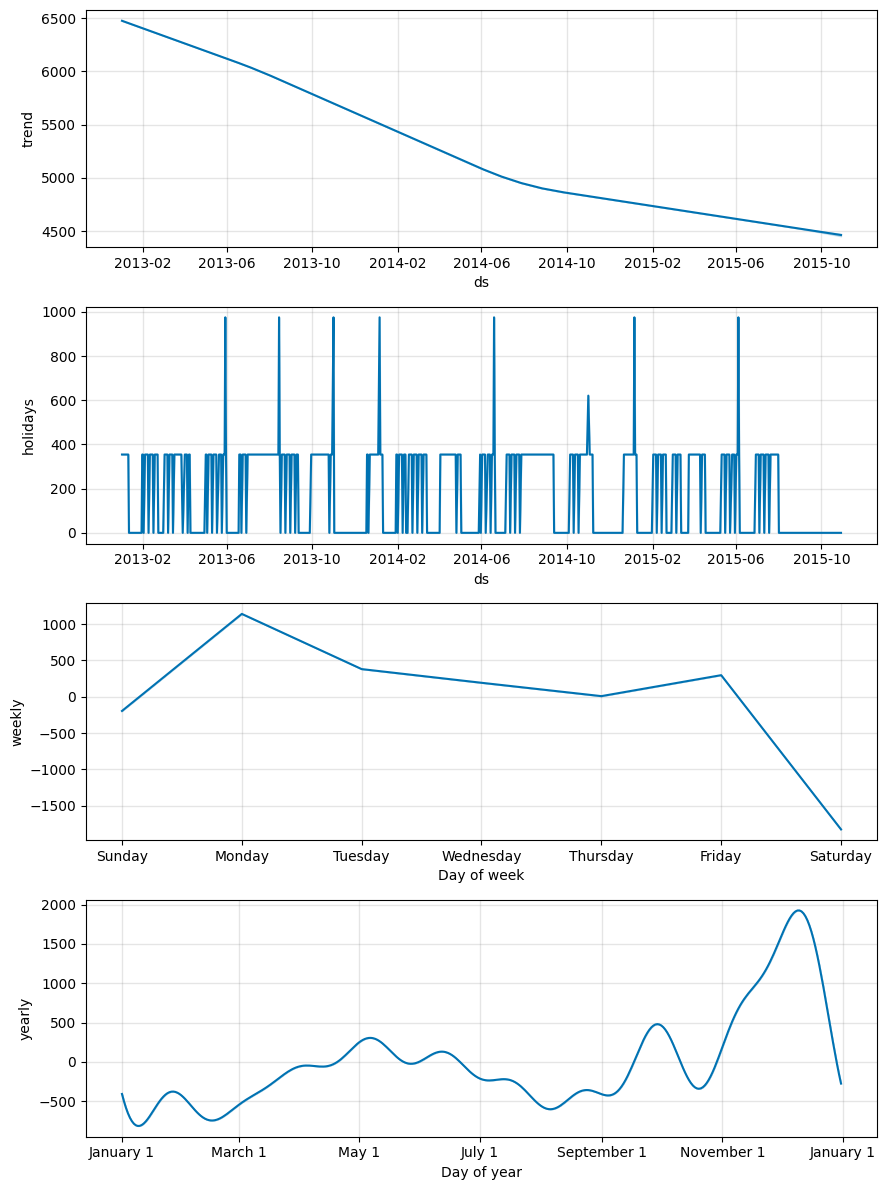

In [95]:
sales_predictions(6, sales_all, school_state_holidays, 90)